# Visualization for Sakila Movie Database

This notebook is used for generating visualizations based on the PostgreSQL data analysis results.

Several interesting questions have been explored as we can see below.

**Table of Contents**

- [Query 1. What is the rental behavior in family movies?](#query1)

- [Query 2. What were the rental duration in quartile for family movies?](#query2)

- [Query 3. What were the rental orders by store?](#query4)

- [Query 4. Payment Difference between months for Top 10 Payors](#query6)




In [1]:
# change to working directory
import os
os.chdir('projects_on_GitHub/udacity_project/SQL/Sakila_Query_Viz')

In [2]:
ls

README.md
Visualization_for_Sakila_QueryResult.ipynb
query.sql
query1.csv
query1_rental_count_byCat.png
query2.csv
query3.csv
query4.csv
query5.csv
query6.csv


In [3]:
# Configure some basic parameters of plotting for general purpose (uniformity)
figsize=(8, 4)
dpi = 100
label_fontsize = 12
title_fontsize = 18
title_pad = 15
label_pad = 6

<a id='query1'></a>
## Query 1. What is the rental behavior in family movies?

We want to understand more about the movies that families are watching. The following categories are considered family movies: **Animation, Children, Classics, Comedy, Family and Music**. Create a query that lists each movie, the film category it is classified in, and the number of times it has been rented out.

In [4]:
# Explore the dataset
df1 = pd.read_csv('query1.csv')
df1.head()

film_title category_name  rental_count
0         Alter Victory     Animation            22
1  Anaconda Confessions     Animation            21
2      Bikini Borrowers     Animation            17
3      Blackout Private     Animation            27
4   Borrowers Bedazzled     Animation            22

In [5]:
# SQL already filtered out the defined 'family movies' for us. Verify as follows.
df1.category_name.unique()

array(['Animation', 'Children', 'Classics', 'Comedy', 'Family', 'Music'],
      dtype=object)

In [6]:
# construct dataframe for plot bar graph
df1 = df1.groupby('category_name').rental_count.sum().sort_values(ascending=False).to_frame().reset_index()
df1

category_name  rental_count
0     Animation          1166
1        Family          1096
2      Children           945
3        Comedy           941
4      Classics           939
5         Music           830

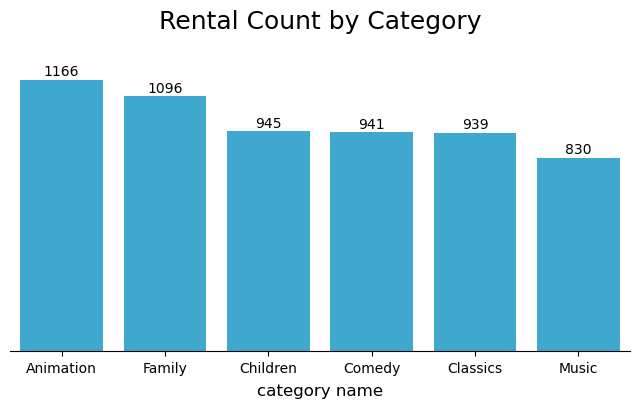

In [7]:
# Figure size and dpi settings
fig = plt.figure(figsize=figsize, dpi=dpi)

# Main function for bar plotting
sns.barplot(data=df1, x='category_name', y='rental_count', color='#26B3E6')

# Customize plotting for presentation
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('white')
fig.set_facecolor('white');

# Map the results on top of respective bars
for i in range (df1.shape[0]):
    plt.text(i, df1.loc[i, 'rental_count']+20, df1.loc[i, 'rental_count'], ha='center')

# Setting for labels and title
plt.title('Rental Count by Category', fontsize=title_fontsize, pad=title_pad)
plt.xlabel('category name', fontsize=label_fontsize, labelpad=label_pad)
plt.ylabel('# of rentals', fontsize=label_fontsize, labelpad=label_pad)
plt.ylim(0, 1300)
plt.xticks(fontsize=10);
ax.axes.yaxis.set_visible(False);

# Export the viz
plt.savefig('query1_rental_count_byCat.png', dpi=120, transparent=True)

<a id='query2'></a>
## Query 2. What were the rental duration in quartile for family movies?

Now we need to know how the length of rental duration of these family-friendly movies compares to the duration that all movies are rented for. Can you provide a table with the movie titles and divide them into 4 levels (first_quarter, second_quarter, third_quarter, and final_quarter) based on the quartiles (25%, 50%, 75%) of the rental duration for movies across all categories? Make sure to also indicate the category that these family-friendly movies fall into.

In [8]:
# Load in the dataset
df2 = pd.read_csv('query2.csv')
df2

film_title category_name  rental_duration  quartile_level
0    Sweethearts Suspects      Children                3               1
1               Go Purple         Music                3               1
2         Bilko Anonymous        Family                3               1
3              Wait Cider     Animation                3               1
4        Daughter Madigan      Children                3               1
..                    ...           ...              ...             ...
356      Wasteland Divine      Classics                7               4
357         Rebel Airport         Music                7               4
358          Pond Seattle     Animation                7               4
359        Perfect Groove        Comedy                7               4
360      Sensibility Rear        Family                7               4

[361 rows x 4 columns]

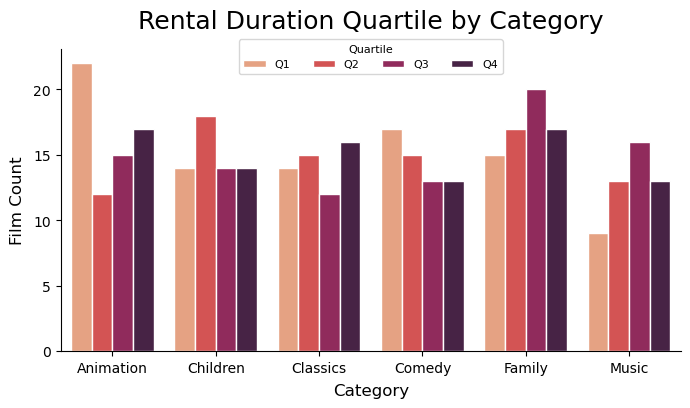

In [10]:
# sort values by category name alphabetically for plotting purpose
df2 = df2.sort_values(by='category_name')

# setting for figure size and resolution
fig = plt.figure(figsize=figsize, dpi=dpi)

# main function for plotting
sns.countplot(data=df2, x='category_name', hue='quartile_level', palette='rocket_r', edgecolor='white')

# customized settings for presentation
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('white')
fig.set_facecolor('white');

# customize legend display
plt.legend(['Q1', 'Q2', 'Q3', 'Q4'], 
           ncol=4, 
           title='Quartile', 
           title_fontsize=8,  
           prop={'size':8}, 
           loc='upper center', 
           fancybox=True, 
           bbox_to_anchor=[.5, 1.05])

# setting for title and axis labels
plt.title(label='Rental Duration Quartile by Category', pad=title_pad, fontsize=title_fontsize)
plt.xlabel('Category', labelpad=label_pad, fontsize=label_fontsize)
plt.ylabel('Film Count', labelpad=label_pad, fontsize=label_fontsize);

# Export viz to file
plt.savefig('query2_rental_duration_quartile.png', dpi=120, transparent=True)

<a id='query3'></a>
## Query 3. What were the rental orders by store?

Finally, provide a table with the family-friendly film category, each of the quartiles, and the corresponding count of movies within each combination of film category for each corresponding rental duration category. The resulting table should have three columns:

- Category
- Rental length category
- Count

In [12]:
# Load in dataset
df3 = pd.read_csv('query4.csv')
df3

rental_month  rental_year  store_id  count_rentals
0             7         2005         2           3367
1             7         2005         1           3342
2             8         2005         1           2892
3             8         2005         2           2794
4             6         2005         1           1163
5             6         2005         2           1148
6             5         2005         2            598
7             5         2005         1            558
8             2         2006         2             97
9             2         2006         1             85

In [13]:
# data wrangling for visualization
df3['rental_year_month'] = df3['rental_year'].astype(str) + '-0' + df3['rental_month'].astype(str)
df3 = df3.sort_values(by='rental_year_month')
df3

rental_month  rental_year  store_id  count_rentals rental_year_month
6             5         2005         2            598           2005-05
7             5         2005         1            558           2005-05
4             6         2005         1           1163           2005-06
5             6         2005         2           1148           2005-06
0             7         2005         2           3367           2005-07
1             7         2005         1           3342           2005-07
2             8         2005         1           2892           2005-08
3             8         2005         2           2794           2005-08
8             2         2006         2             97           2006-02
9             2         2006         1             85           2006-02

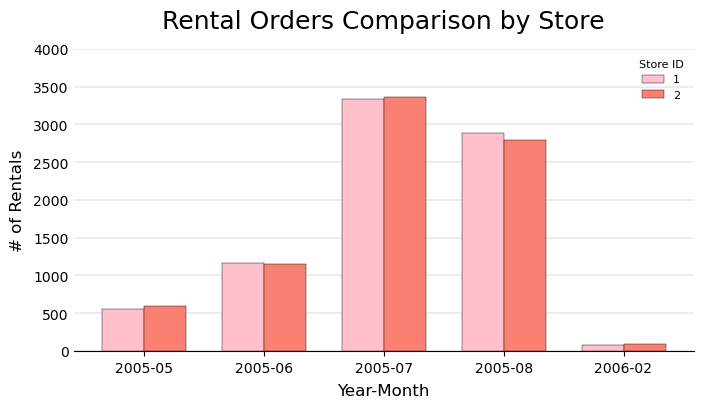

In [14]:
# setting for figure size and resolution
fig = plt.figure(figsize=figsize, dpi=100)

# properties for clusterred bar plots
bar_width = .35
tick_labels = sorted(df3.rental_year_month.unique())
x_pos = np.arange(len(tick_labels))
plt.grid(axis='y', color='grey', zorder=0, linewidth=.2)

# main function for bar plotting
# bar plot for 'store 1'
plt.bar(data=df3[df3.store_id==1], 
        x=x_pos, 
        height='count_rentals', 
        width=bar_width, 
        label='1', 
        zorder=10, 
        color='pink', 
        edgecolor='k', 
        linewidth=.3)

# bar plot for 'store 2'
plt.bar(data=df3[df3.store_id==2], 
        x=x_pos + bar_width, 
        height='count_rentals', 
        width=bar_width, 
        label='2', 
        zorder=10, 
        color='salmon', 
        edgecolor='k', 
        linewidth=.3)

# customized configurations for clusterred barplots
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('white')
fig.set_facecolor('white')
ax.tick_params(axis='y', length=0);

plt.xticks(x_pos + bar_width/2, tick_labels)
plt.ylim(0, 4000)

plt.xlabel('Year-Month', fontsize=label_fontsize, labelpad=label_pad)
plt.ylabel('# of Rentals', fontsize=label_fontsize, labelpad=label_pad)
plt.title('Rental Orders Comparison by Store', pad=title_pad, fontsize=title_fontsize)

plt.legend(title='Store ID', 
           loc='upper right', 
           frameon=False, 
           title_fontsize=8, 
           prop={'size': 8});

# export viz to file
plt.savefig('query3_retal_orders_byStore.png', dpi=120, transparent=True)